In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

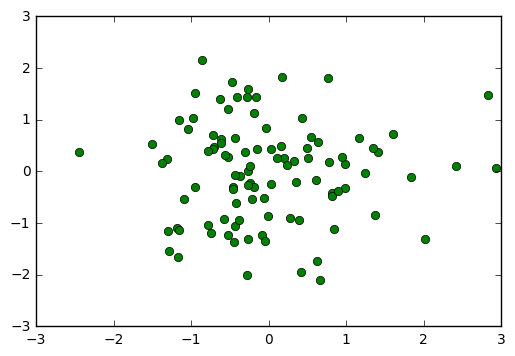

In [3]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'go')

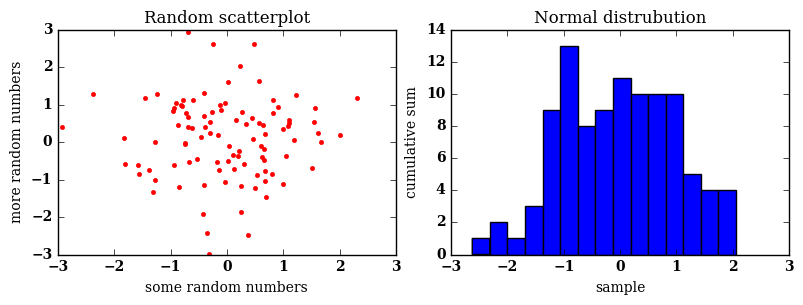

In [5]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(8,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

## Plotting in Pandas
Pandas 的 DataFrame 和 Series 直接支持 matplotlib 绘制。

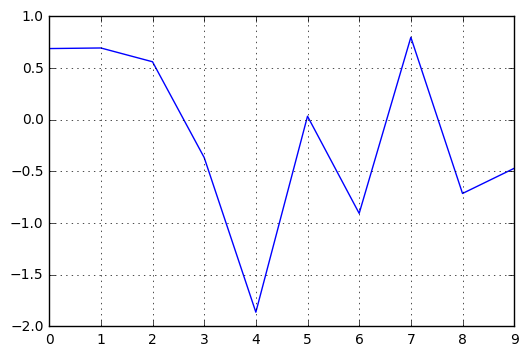

In [7]:
normals = pd.Series(np.random.normal(size=10))
normals.plot(grid=True)

对于 DataFrame 类型的数据：

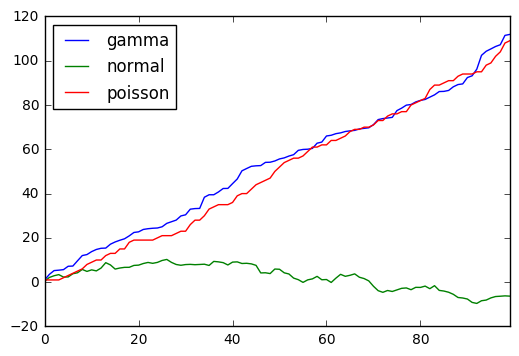

In [13]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
# dataframe.cumsum 用于计算 dataframe 的累积和,axis属性指定累积和的轴
variables.cumsum(0).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ae1bf6250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6ae18f0590>], dtype=object)

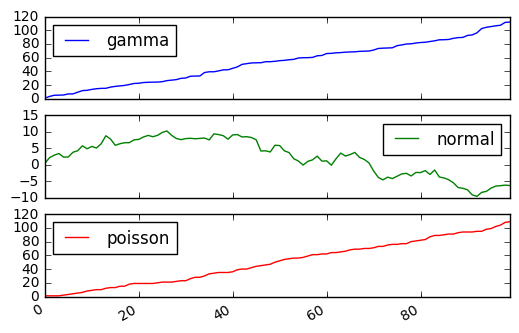

In [16]:
# variables DataFrame 包含多列时，可通过 subplots 指定分开绘制
variables.cumsum(0).plot(subplots=True)

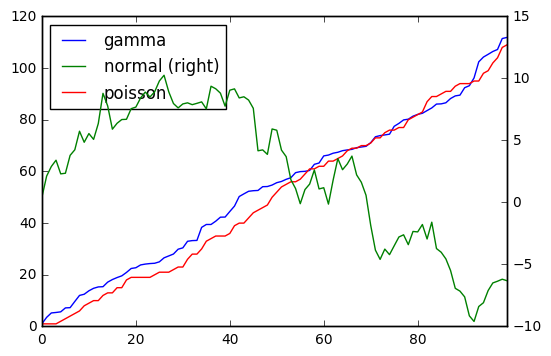

In [19]:
# secondary_y （DataFrame的key值）用于指定在右边的标记
variables.cumsum(0).plot(secondary_y='normal')

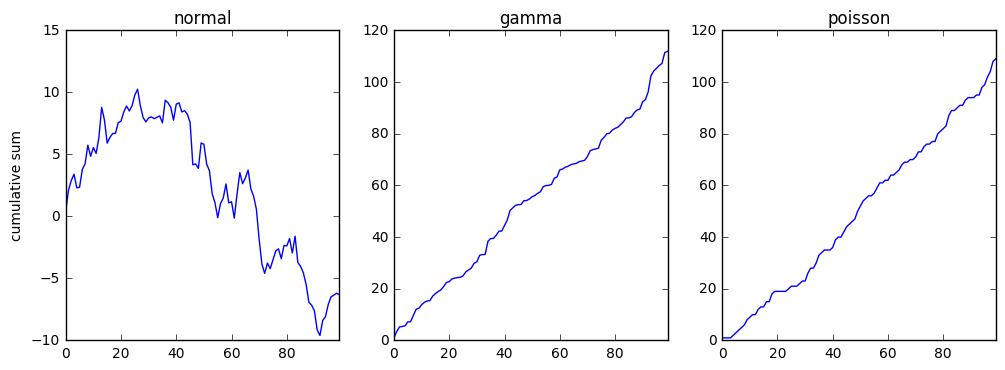

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Titanic Demo
Bar plots

In [28]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

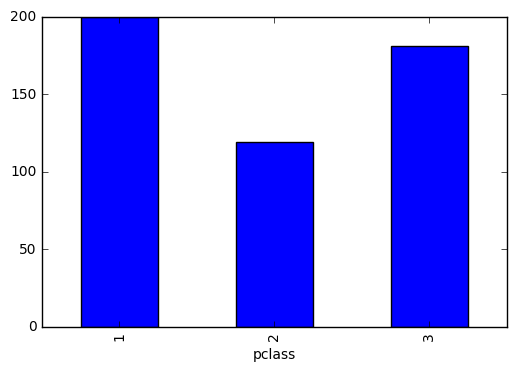

In [26]:
# Compute sum of group values
titanic.groupby('pclass').survived.sum().plot(kind='bar')

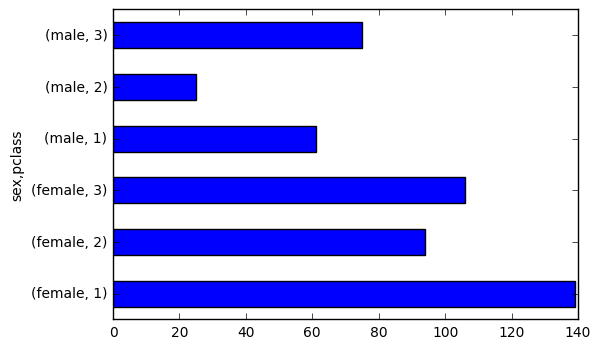

In [31]:
# 按照性别和pclass类别进行分类，并绘制水平分直方图
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

In [38]:
# crosstab 用于按照指定的行和列统计分组频数。
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool), dropna=True)
death_counts
#death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

survived       False  True 
pclass sex                 
1      female      5    139
       male      118     61
2      female     12     94
       male      146     25
3      female    110    106
       male      418     75

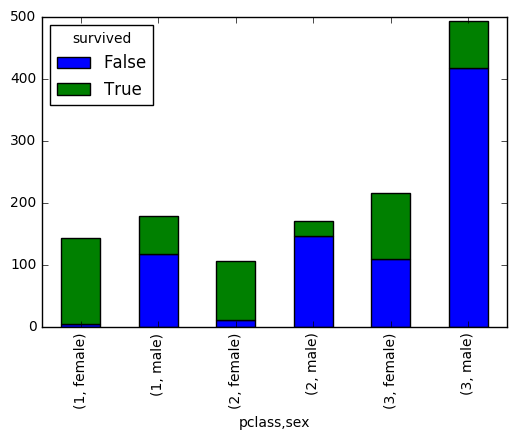

In [44]:
death_counts.plot(kind='bar')

查看所观察的元素在不同类别中的比例

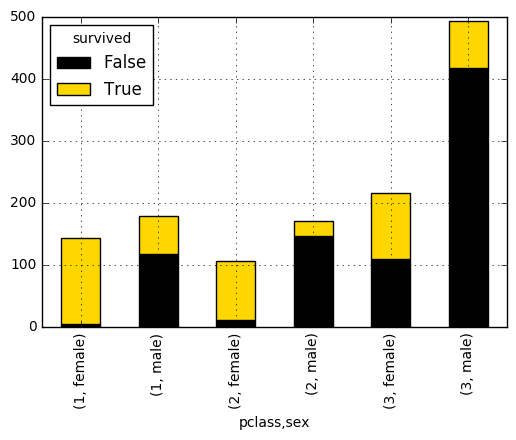

In [49]:
# 将两类数据图标堆叠起来, color 指定堆叠的两类的颜色
death_counts.plot(kind='bar', stacked=True, color=['black', 'gold'], grid=True)

Another way of comparing the groups is to look at the survival rate, by adjusting for the number of people in each group.

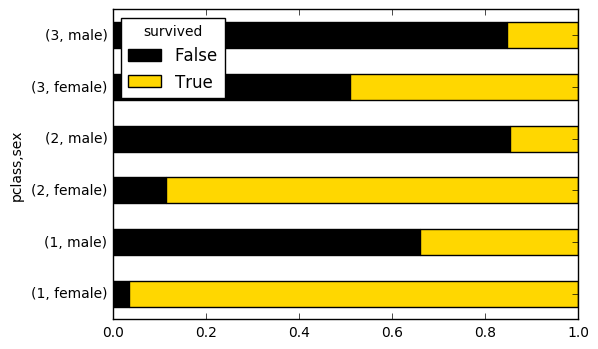

In [52]:
death_counts.div(death_counts.sum(1).astype(float), axis=0)\
    .plot(kind='barh', stacked=True, color=['black', 'gold'])

## Histograms
在处理数据之前，确定数据的分布是很有帮助的。

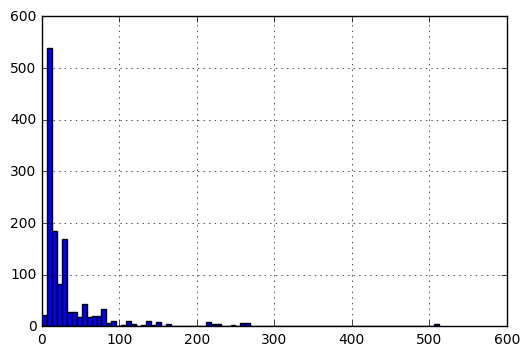

In [58]:
titanic.fare.hist(bins=80)

对于直方图的 bins 的选择，又相应的优化算法。

In [59]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
n, sturges(n), square_root(n), doanes(titanic.fare.dropna())

(1309, 11, 36, 14)

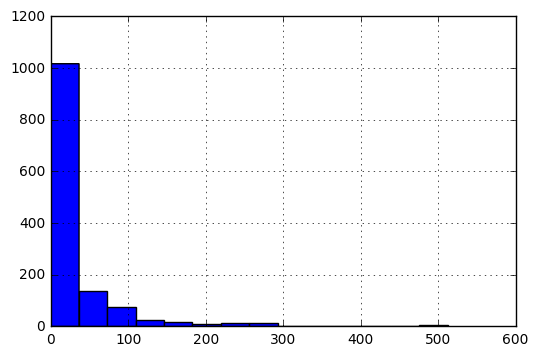

In [62]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

density plot 密度图可以刻画相对直方图更精确的数据分布。Pandas中可以通过 `kind='kde'`指定，kde 表示 kernel density estimate.

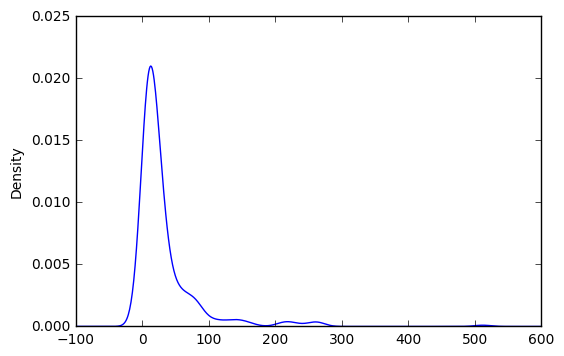

In [66]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

通常密度图和直方图绘制在一起。

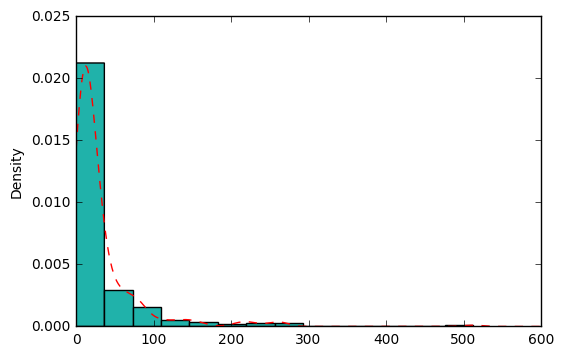

In [73]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')